In [11]:
from pandas import read_csv
filename = 'dataset//cost_of_living/cost_of_living.csv'
df_cost_of_living = read_csv(filename).dropna()
df_cost_of_living.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Argentina,1287.8540,1567.5980,1938.3650,1855.1085,2003.9330,2250.2455,2134.153345,2162.854675,1845.922275,1547.585985,1450.537395
4,Australia,2305.9525,3402.0115,3497.3400,3606.2805,3505.2375,3031.5370,3015.473135,3013.260195,3118.820875,3015.915325,3029.782315
5,Austria,2098.4985,2771.5665,2395.3730,2461.0660,2535.7345,2414.0015,2746.560665,2763.594395,2892.079440,2807.800890,2715.892825
11,Belgium,2467.6735,3089.2735,2618.6360,2795.8555,3031.6935,2755.3645,2950.407795,2784.550510,3012.334075,2876.052530,2974.076965
14,Bosnia And Herzegovina,1201.1620,1351.2165,1291.5925,1345.5085,1383.9850,1215.0130,1374.416230,1362.515830,1452.223765,1488.702065,1454.164550


# PCA

In [3]:
from sklearn.preprocessing import StandardScaler
features = [str(x) for x in range(2010,2021)]
# Separating out the features
x = df_cost_of_living.loc[:, features].values
# Separating out the target
y = df_cost_of_living.loc[:,['Country']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

result_x = pca.fit_transform(x)

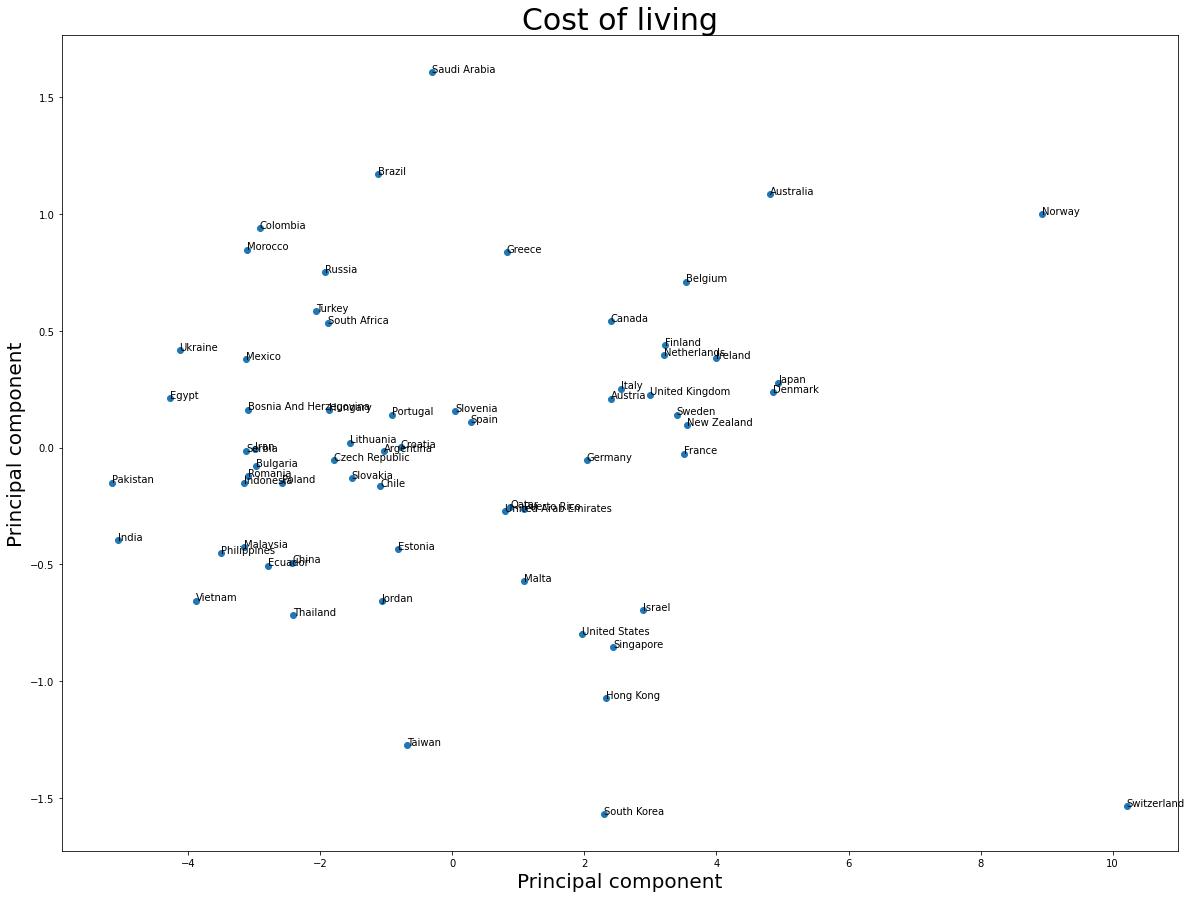

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(result_x[:,0],result_x[:,1])
plt.title("Cost of living",fontsize=30)
plt.ylabel('Principal component',fontsize=20)
plt.xlabel('Principal component',fontsize=20)
for i, txt in enumerate(y):
    ax.annotate(txt[0], (result_x[i,0], result_x[i,1]))

# TSNE

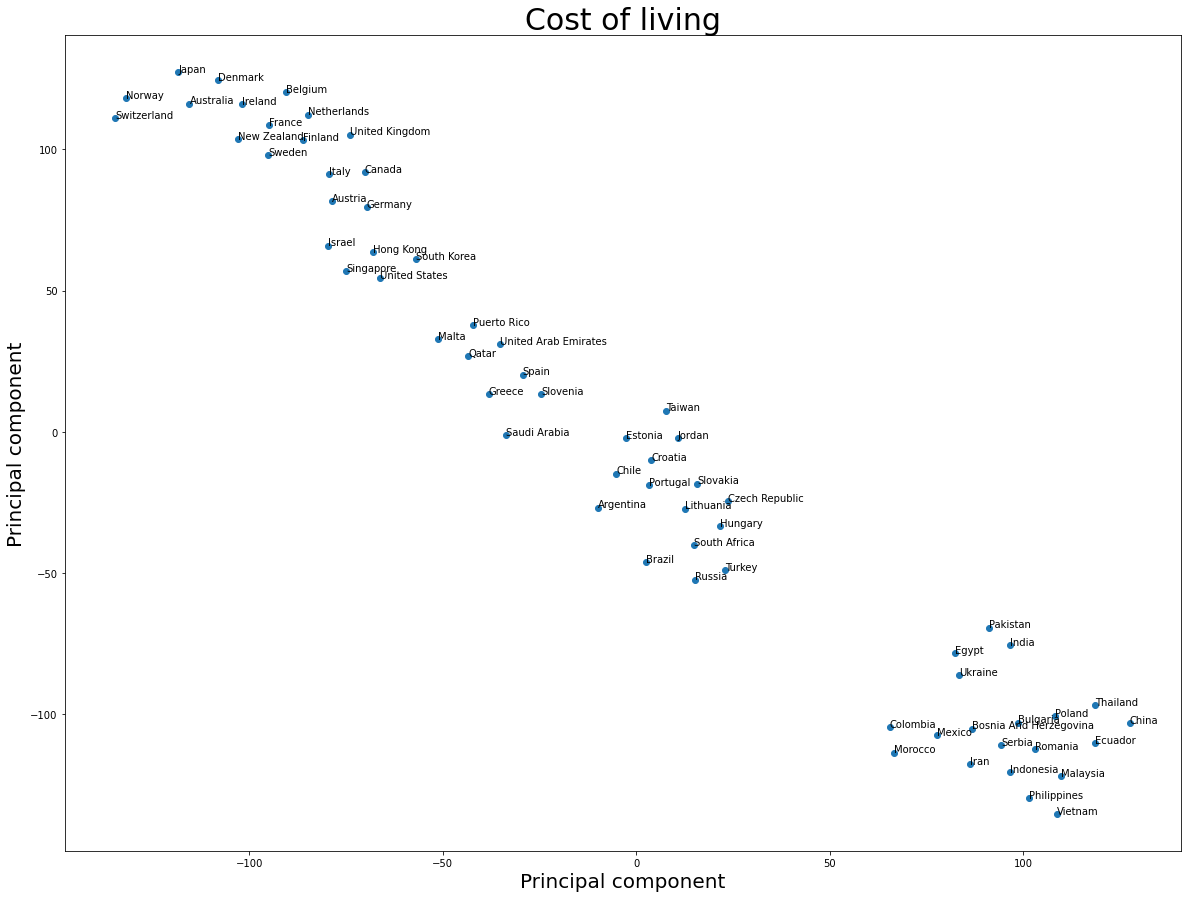

In [9]:
from sklearn.manifold import TSNE    
fig, ax = plt.subplots(figsize=(20,15))
tsne = TSNE(n_components=2,perplexity=10)
result_x = tsne.fit_transform(x)
ax.scatter(result_x[:,0],result_x[:,1])
plt.title("Cost of living",fontsize=30)
plt.ylabel('Principal component',fontsize=20)
plt.xlabel('Principal component',fontsize=20)
for j, txt in enumerate(y):
    ax.annotate(txt[0], (result_x[j,0], result_x[j,1]))

# Calculate real wealth

In [163]:
from pandas import merge as pd_merge,pivot
filename = 'dataset//earnings_split/EAR_4MTH_SEX_ECO_CUR_NB_A-filtered-2021-03-21.csv'
df_field_incomes_columns_csv = ["ref_area.label","classif1.label","classif2.label","time","obs_value"]
df_field_incomes_columns_names = ["Country","Field","Currency","Year","Income"]
df_field_incomes = read_csv(filename,usecols=df_field_incomes_columns_csv)
df_field_incomes = df_field_incomes[(df_field_incomes["classif2.label"]=="Currency: U.S. dollars") & (df_field_incomes["time"]>2009)].drop("classif2.label", axis=1)
df_field_incomes = df_field_incomes.rename(columns={k:v for k,v in zip(df_field_incomes_columns_csv,df_field_incomes_columns_names)})
df_field_incomes = df_field_incomes[(df_field_incomes["Field"]=="Economic activity (Aggregate): Total") | (~df_field_incomes.Field.str.endswith('Total')) ]
df_field_incomes["Field"] = list(map(lambda text: text.split(":")[1][1:],df_field_incomes["Field"]))
# Fields = [
#         'Total', 
#         'A. Agriculture, hunting and forestry', 
#         'B. Fishing',
#         'C. Mining and quarrying', 'D. Manufacturing',
#         'E. Electricity, gas and water supply', 'F. Construction',
#         'G. Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods',
#         'H. Hotels and restaurants',
#         'I. Transport, storage and communications',
#         'J. Financial intermediation',
#         'K. Real estate, renting and business activities',
#         'L. Public administration and defence; compulsory social security',
#         'M. Education', 'N. Health and social work',
#         'O. Other community, social and personal service activities',
#         'P. Activities of private households as employers and undifferentiated production activities of private households',
#         'Q. Extraterritorial organizations and bodies'
#        ]
# df_field_incomes = df_field_incomes.loc[df_field_incomes['Field'].isin(Fields)] 
df_field_incomes.head(25)

,Country,Field,Year,Income
5,Aruba,"A. Agriculture, hunting and forestry",2010,1221.79
8,Aruba,B. Fishing,2010,1022.35
11,Aruba,C. Mining and quarrying,2010,1463.13
14,Aruba,D. Manufacturing,2010,2031.28
17,Aruba,"E. Electricity, gas and water supply",2010,3022.35
20,Aruba,F. Construction,2010,1390.50
23,Aruba,G. Wholesale and retail trade; repair of motor...,2010,1320.67
26,Aruba,H. Hotels and restaurants,2010,1342.46
29,Aruba,"I. Transport, storage and communications",2010,1872.07
32,Aruba,J. Financial intermediation,2010,2451.96


In [164]:
grupedByYear = [ddd.rename(columns={"Income":str(int(Year))}).drop("Year", axis=1) for Year,ddd in df_field_incomes.groupby("Year")]
from functools import reduce
from pandas import merge as pd_merge
merged_pd = reduce(lambda a,b: pd_merge(a,b, on=["Field", "Country"],how="left"),grupedByYear[:-1])
merged_pd[merged_pd.Country == "Poland"].head(50)

,Country,Field,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1275,Poland,A. Agriculture; forestry and fishing,1095.90,1231.45,1210.21,1256.24,1322.80,1153.54,1139.70,1216.49,112.96,111.64
1276,Poland,B. Mining and quarrying,1929.43,2239.87,1941.39,2154.29,2159.02,1813.88,1733.10,1858.10,179.35,180.22
1277,Poland,C. Manufacturing,967.46,1045.59,996.16,1071.54,1121.04,973.42,971.94,1086.95,101.68,102.30
1278,Poland,"D. Electricity; gas, steam and air conditionin...",1741.81,1896.80,1804.67,1972.57,2014.13,1736.82,1716.16,1856.16,171.28,169.05
1279,Poland,"E. Water supply; sewerage, waste management an...",1070.41,1133.54,1065.38,1127.89,1168.13,1014.80,1005.19,1088.48,99.79,99.41
1280,Poland,F. Construction,903.12,973.42,906.38,946.97,983.44,853.56,840.34,940.33,88.38,88.16
1281,Poland,G. Wholesale and retail trade; repair of motor...,873.54,936.38,892.14,950.35,992.15,869.65,869.60,987.06,92.99,93.46
1282,Poland,H. Transportation and storage,979.16,1033.99,972.25,1030.97,1069.72,920.48,902.07,994.77,92.62,92.44
1283,Poland,I. Accommodation and food service activities,670.94,710.21,668.51,718.62,751.42,652.50,657.82,752.45,69.13,69.37
1284,Poland,J. Information and communication,1836.65,1975.38,1811.82,1950.85,2036.28,1773.53,1790.76,1976.23,185.96,183.17


In [170]:
new_merge = pd_merge(df_cost_of_living.drop("2020",axis=1),merged_pd, on=["Country"],how="inner")
for x in range(2010,2020):
    new_merge[str(x)] = new_merge[str(x)+"_x"]/new_merge[str(x)+"_y"]
    del new_merge[str(x)+"_x"]
    del new_merge[str(x)+"_y"]
new_merge[.Country == "Poland".head(50)

,Country,Field,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
26,Austria,B. Mining and quarrying,0.511443,0.562308,0.508152,0.496397,0.543331,0.557737,0.638523,0.569448,0.536458,0.537882
27,Austria,C. Manufacturing,0.574352,0.659534,0.598719,0.576196,0.623969,0.652980,0.728509,0.706424,0.685400,0.682487
28,Austria,"D. Electricity; gas, steam and air conditionin...",0.396423,0.438093,0.391765,0.385329,0.446275,0.439719,0.488541,0.477989,0.467621,0.470747
29,Austria,"E. Water supply; sewerage, waste management an...",0.651942,0.807107,0.732577,0.707540,0.688323,0.801078,0.895453,0.867192,0.838675,0.824505
30,Austria,F. Construction,0.649268,0.858245,0.788333,0.775659,0.681930,0.872038,0.973440,0.939819,0.911741,0.890359
31,Austria,G. Wholesale and retail trade; repair of motor...,0.725775,0.937005,0.851718,0.830591,0.794637,0.938625,1.049620,1.016771,0.985884,0.980124
32,Austria,H. Transportation and storage,0.609752,0.776269,0.698804,0.691435,0.684865,0.763683,0.884600,0.868116,0.846504,0.844777
33,Austria,I. Accommodation and food service activities,1.017952,2.044290,1.871897,1.806088,1.098229,2.037201,2.261903,2.153473,2.064871,2.039145
34,Austria,J. Information and communication,0.440924,0.550949,0.504031,0.489318,0.499403,0.567188,0.638523,0.622797,0.607374,0.607004
35,Austria,K. Financial and insurance activities,0.437028,0.481182,0.440342,0.427857,0.478736,0.488709,0.518775,0.515129,0.518732,0.525706
